In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df_HPI = pd.read_csv("data/HPI_PO_monthly_hist_cleaned.csv")

In [3]:
df_HPI["Month"] = pd.to_datetime(df_HPI["Month"])

In [4]:
df_HPI = df_HPI.set_index('Month')
month_index = df_HPI.index.to_period('M')

df_HPI['days_from_start'] = (df_HPI.index - df_HPI.index[0]).days;
df_HPI['month'] = month_index;

In [5]:
# creating feature variables
x = df_HPI['days_from_start'].values.reshape(-1, 1)
y = df_HPI['New England NSA'].values
print(x[:5])
y[:5]

[[  0]
 [ 31]
 [ 59]
 [ 90]
 [120]]


array([100.  , 101.7 , 101.48, 101.  ,  99.72])

[308.20607263 315.19880208 322.19153154]


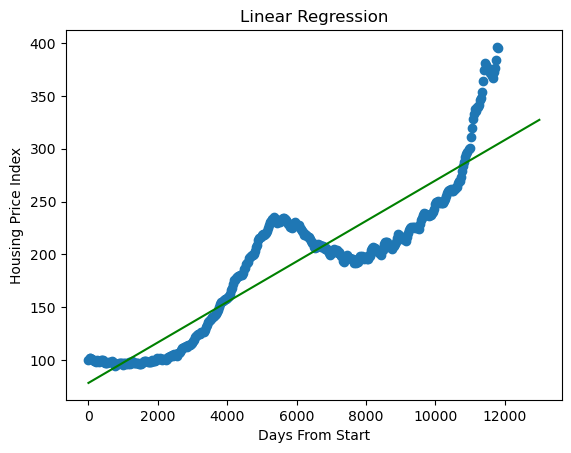

In [6]:
model = linear_model.LinearRegression().fit(x, y)
linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
print(model.predict([[12000], [12365], [12730]]))

xfit = np.linspace(0, 13000)
yfit = model.predict(xfit[:13000, np.newaxis])

# plot predicted data
plt.scatter(x, y)
plt.plot(xfit, yfit,
         color='green')
plt.title('Linear Regression')
plt.xlabel('Days From Start')
plt.ylabel('Housing Price Index')
plt.show()

In [117]:
df_last_recession=df_HPI['2008-01-01': '2013-05-01']
df_last_recession

,East North Central NSA,East North Central SA,East South Central NSA,East South Central SA,Middle Atlantic NSA,Middle Atlantic SA,Mountain NSA,Mountain SA,New England NSA,New England SA,...,South Atlantic NSA,South Atlantic SA,West North Central NSA,West North Central SA,West South Central NSA,West South Central SA,USA NSA,USA SA,days_from_start,month
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,180.34,182.07,195.24,196.23,214.61,214.68,270.74,273.20,218.31,219.88,...,226.21,227.46,206.84,209.08,194.79,195.75,212.30,213.75,6209,2008-01
2008-02-01,180.45,181.77,197.06,197.82,213.46,214.09,272.74,273.86,219.09,221.10,...,223.63,224.30,206.92,208.01,195.23,196.01,211.55,212.41,6240,2008-02
2008-03-01,180.26,180.83,196.89,197.48,213.54,213.57,269.91,271.19,218.29,217.66,...,223.61,222.90,207.83,208.37,195.36,195.09,210.44,210.55,6269,2008-03
2008-04-01,179.90,179.01,197.76,196.90,211.67,211.50,266.46,265.61,217.77,216.00,...,221.48,219.61,208.70,207.19,196.25,194.92,209.37,208.22,6300,2008-04
2008-05-01,180.83,177.46,198.93,196.76,213.89,211.69,265.92,263.20,216.01,213.41,...,217.45,214.99,208.00,205.24,197.03,194.77,208.50,205.94,6330,2008-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,159.72,162.66,182.86,184.12,190.91,191.86,224.87,226.63,195.31,196.74,...,185.10,186.63,196.84,199.73,200.98,202.41,187.41,189.30,8036,2013-01
2013-02-01,160.56,163.25,184.25,185.75,191.80,193.85,226.91,228.40,195.23,197.49,...,186.90,188.36,197.37,199.79,202.41,203.65,188.72,190.55,8067,2013-02
2013-03-01,163.52,164.76,187.06,187.00,192.68,193.94,231.39,232.87,199.26,200.11,...,190.67,190.17,200.61,201.52,205.61,204.64,192.15,192.45,8095,2013-03


In [118]:
df_last_5_months=df_HPI['2023-01-01': '2023-05-01']
df_last_5_months

,East North Central NSA,East North Central SA,East South Central NSA,East South Central SA,Middle Atlantic NSA,Middle Atlantic SA,Mountain NSA,Mountain SA,New England NSA,New England SA,...,South Atlantic NSA,South Atlantic SA,West North Central NSA,West North Central SA,West South Central NSA,West South Central SA,USA NSA,USA SA,days_from_start,month
Month,,,,,,,,,,,,,,,,,,,,,
2023-01-01,310.92,315.00,371.33,372.75,336.08,337.29,557.46,564.51,372.66,374.66,...,425.22,426.92,367.12,372.28,398.33,401.26,389.93,392.75,11688,2023-01
2023-02-01,315.55,317.34,379.00,378.81,339.46,341.22,571.10,572.41,376.27,380.30,...,428.24,427.38,374.22,376.19,406.79,407.51,395.47,396.04,11719,2023-02
2023-03-01,323.33,322.28,383.06,380.06,344.76,344.26,570.05,565.61,383.70,380.80,...,434.92,430.40,380.83,378.59,409.74,408.69,401.16,398.30,11747,2023-03
2023-04-01,329.64,325.13,382.70,379.66,354.39,350.02,580.64,570.23,396.40,388.43,...,439.57,432.95,386.23,380.61,416.46,410.99,407.39,401.23,11778,2023-04
2023-05-01,336.94,329.31,385.90,380.20,358.48,350.37,585.22,572.11,395.60,386.52,...,444.76,435.73,393.25,383.08,420.58,413.35,413.08,404.09,11808,2023-05


[148.95789694 148.61173687 148.29907616 147.95291608 147.61792247]


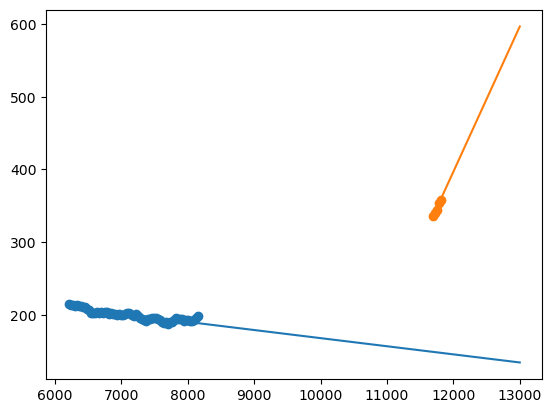

-0.01116645392084206 279.47141036392156
[201.30623292]


In [294]:
x2 = df_last_recession['days_from_start'].values.reshape(-1, 1)
y2 = df_last_recession['Middle Atlantic NSA'].values

x3 = df_last_5_months['days_from_start'].values.reshape(-1, 1)
y3 = df_last_5_months['Middle Atlantic NSA'].values

model2 = linear_model.LinearRegression().fit(x2, y2)
linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print(model2.predict(x3))
xfit2 = np.linspace(6250, 13000)
yfit2 = model2.predict(xfit2[:13000, np.newaxis])

model3 = linear_model.LinearRegression(fit_intercept=True)
model3.fit(x3, y3)
xfit3 = np.linspace(11808, 13000)
yfit3 = model3.predict(xfit3[:13000, np.newaxis])
#print(model3.predict([[12000], [12365], [12730]]))

plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.plot(xfit2, yfit2);
plt.plot(xfit3, yfit3);
plt.show()

slope, intercept = np.polyfit(df_last_recession['days_from_start'], y2, 1)
print(slope, intercept)
print(model2.predict([[7000]]))

In [8]:
#avg_HPI_by_month = pd.DataFrame(df_HPI.groupby('month').mean(axis='columns').reset_index())
HPI_By_Regions = df_HPI.iloc[:, 1:17]
avg_HPI_by_month = pd.DataFrame(HPI_By_Regions.mean(axis=1))
avg_HPI_by_month = avg_HPI_by_month.rename(columns={0: "Average HPI"} )

#create differential column between months
avg_HPI_by_month['HPI_diff'] = avg_HPI_by_month["Average HPI"].diff()

<Axes: xlabel='Month'>

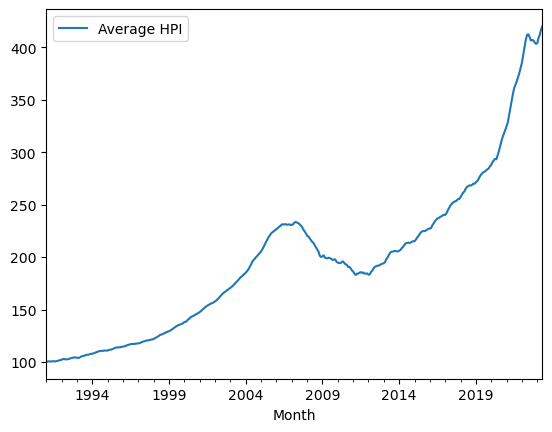

In [9]:
avg_HPI_by_month.plot(y='Average HPI', use_index=True)

In [10]:
supervised_data = avg_HPI_by_month.reset_index().fillna(0) #avg_HPI_by_month.reset_index().drop(['Average HPI'], axis=1).fillna(0)
supervised_data.head(10)

,Month,Average HPI,HPI_diff
0,1991-01-01,100.000000,0.000000
1,1991-02-01,100.414375,0.414375
2,1991-03-01,100.541250,0.126875
3,1991-04-01,100.431250,-0.110000
4,1991-05-01,100.396250,-0.035000
5,1991-06-01,100.698125,0.301875
6,1991-07-01,100.649375,-0.048750
7,1991-08-01,100.498125,-0.151250
8,1991-09-01,100.790000,0.291875
9,1991-10-01,101.060625,0.270625


In [22]:
supervised_data['MonthC'] = supervised_data['Month'].apply(lambda time: time.month)
supervised_data['Year'] = supervised_data['Month'].apply(lambda time: time.year)
train_data = supervised_data.loc[supervised_data["Month"].between('2007-04-01', '2012-3-01')]

test_data = supervised_data.tail(60)
#test_data['Month'] = test_data['Month'].apply(lambda time: time.month)

len(train_data)

60

In [23]:
from sklearn.model_selection import train_test_split

x = train_data['Month'].values.reshape(-1, 1)#train_data.index.values.reshape(-1, 1)
y = train_data['Average HPI'].values.reshape(-1, 1) #train_data['HPI_diff'].values.reshape(-1, 1)

x2 = test_data['Month'].values.reshape(-1, 1)#test_data.index.values.reshape(-1, 1)
y2 = test_data['Average HPI'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

recession_train_data = supervised_data.loc[supervised_data["Month"].between('2007-04-01', '2012-3-01')]

train_data = supervised_data.head(328)
test_data = supervised_data.tail(60)

x = train_data.index.values.reshape(-1, 1)
y = train_data['Average HPI'].values.reshape(-1, 1)

x2 = test_data.index.values.reshape(-1, 1)
y2 = test_data['Average HPI'].values.reshape(-1, 1)

# Fitting Random Forest Regression to the dataset
 
# create regressor object
rfr = RandomForestRegressor(n_estimators=1000,
                                  random_state=0)
 
# fit the regressor with x and y data
rfr.fit(x, train_data['Average HPI'])

#score = rfr.score(X_train, y_train)
#print("R-squared:", score)

y_pred = rfr.predict(x)

#Y_predNew = rfr.predict(np.array(['2023-12-01']).reshape(1, 1))
#print(Y_predNew)

mse = mean_squared_error(y, y_pred)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

#train_rmse = np.sqrt(mean_squared_error(y, y_pred_train))
#test_rmse = np.sqrt(mean_squared_error(y2, y_pred_test))

y_test = rfr.predict(x2)

y_pred_future = rfr.predict(np.linspace(388, 404).reshape(-1, 1))

print(y_test)

MSE:  0.06481630108575037
RMSE:  0.2545904575700951
[261.78448062 261.78448062 261.78448062 261.78448062 261.78448062
 261.78448062 261.78448062 261.78448062 261.78448062 261.78448062
 261.78448062 261.78448062 261.78448062 261.78448062 261.78448062
 261.78448062 261.78448062 261.78448062 261.78448062 261.78448062
 261.78448062 261.78448062 261.78448062 261.78448062 261.78448062
 261.78448062 261.78448062 261.78448062 261.78448062 261.78448062
 261.78448062 261.78448062 261.78448062 261.78448062 261.78448062
 261.78448062 261.78448062 261.78448062 261.78448062 261.78448062
 261.78448062 261.78448062 261.78448062 261.78448062 261.78448062
 261.78448062 261.78448062 261.78448062 261.78448062 261.78448062
 261.78448062 261.78448062 261.78448062 261.78448062 261.78448062
 261.78448062 261.78448062 261.78448062 261.78448062 261.78448062]


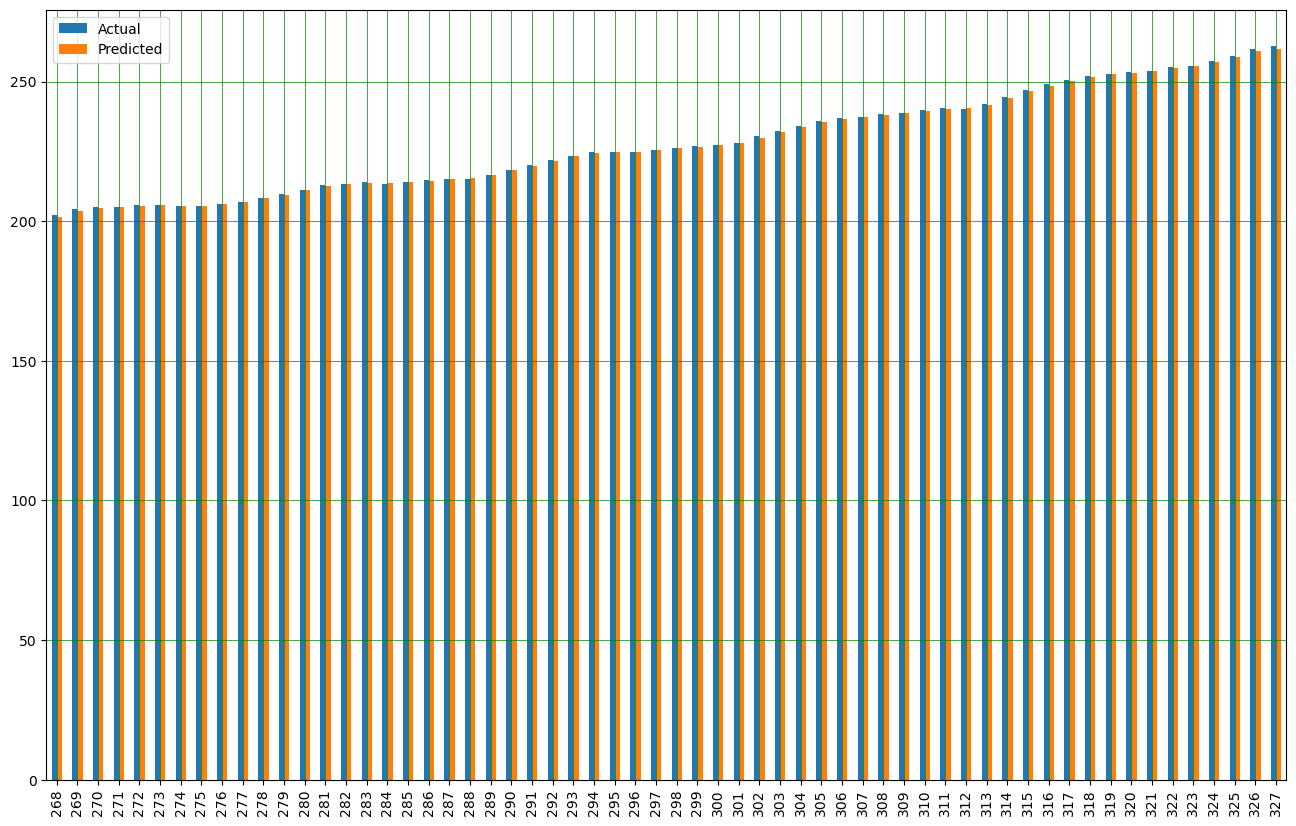

In [49]:
df2 = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df1 = df2.tail(60)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

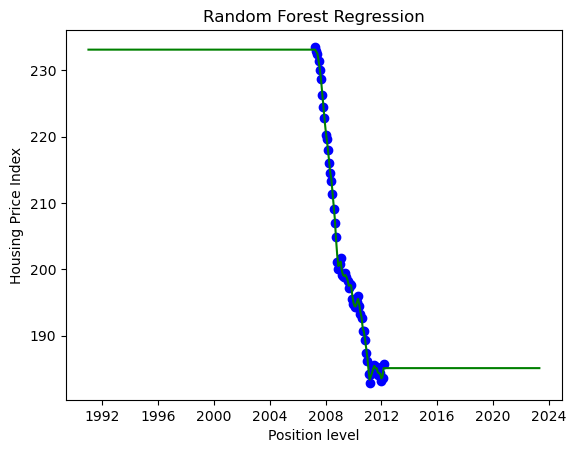

In [26]:
# Visualising the Random Forest Regression results
 
# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
X_grid = df_HPI.index.values #supervised_data.reset_index(drop=True).loc[supervised_data['Month'].between('2008-01-01', '2023-05-01'), 'Month']
 
# reshape for reshaping the data
# into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value
X_grid = X_grid.reshape((len(X_grid), 1))
 
# Scatter plot for original data
plt.scatter(x, y, color='blue')
 
# plot predicted data
plt.plot(X_grid, rfr.predict(np.arange(0,389).reshape(-1,1)),
         color='green')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Housing Price Index')
plt.show()